In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [5]:
image_path ="output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

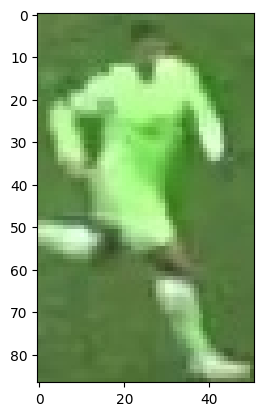

In [6]:
plt.imshow(image)
plt.show()

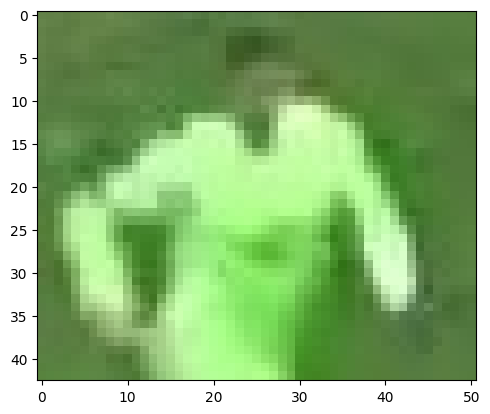

In [7]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

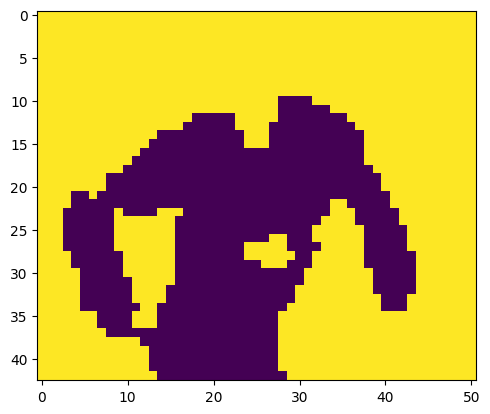

In [10]:
#Cluster the image
#Reshape image to 2D array of pixels
image_2d = top_half_image.reshape(-1, 3)
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)
#Get lables
labels = kmeans.labels_

#reshape lables back to og shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [13]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [14]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [15]:
kmeans.cluster_centers_[player_cluster]

array([171.29634641, 235.59269283, 142.84573748])